In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
from env import get_url

# Hypothesis Testing Categorical to Categorical w/ Chi Squared 

## Exercise 1

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|                       | codeup student | not codeup student |
|-----------------------|----------------|--------------------|
| uses a macbook        | 49             | 20                 |
| doesn't use a macbook | 1              | 30                 | 


$H_0$: Using a macbook and being a codeup student are independent of eachother

$H_a$: Using a macook and being a codeup student are dependent on eachother

In [24]:
df = pd.DataFrame([[49, 20], [1, 30]])
df.columns = ["codeup student", "not codeup"]
df.index = ["macbook", "not macbook"]
df

,codeup student,not codeup
macbook,49,20
not macbook,1,30


In [25]:
chi2, p, degf, expected = stats.chi2_contingency(df)

In [26]:
# probability of observing the results given the null hypothesis is true
p

1.4116760526193828e-09

In [29]:
null_hypothesis = "having a macbook and being a codeup student are independent."
alternative_hypothesis = "macbook ownership and being a codeup student are dependent. There is a relationship"

alpha = .01 # 99% confidence level

if p < alpha:
    print("We reject the null hypothesis")
    print("We can say that we have confidence that", alternative_hypothesis)
else:
    print("We fail to reject the null")

We reject the null hypothesis
We can say that we have confidence that macbook ownership and being a codeup student are dependent. There is a relationship


## Exercise 2
- Choose another 2 categorical variables from the mpg dataset and perform a $\chi^2$ contingency test with them. 
- Be sure to state your null and alternative hypotheses.

#### $H_0$: manufacturer is independent of the class of vehicle (suv, compact, pickup, etc...)
$H_a$: manufacturer and vehicle class are dependent

In [30]:
mpg = data("mpg")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [31]:
observed = mpg[["manufacturer", "class"]]
observed.dtypes

manufacturer    object
class           object
dtype: object

In [33]:
# Crosstab is critical. We need the crosstabulation
observed = pd.crosstab(mpg["class"], mpg.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

5.267718408816259e-54

In [36]:
alpha = 0.01
null_h = "vehicle class and Manufacturer are independent"
alternative_h = "Vehicle class and manufacture are dependent"
if p < alpha:
    print("We reject the null hypothesis that", null_h)
    print(alternative_h)
else:
    print("we fail to reject the null hypothesis that", null_h)

We reject the null hypothesis that vehicle class and Manufacturer are independent
Vehicle class and manufacture are dependent


# Exercise 3
Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

## $H_0$: Sales or marketing employees are independent of gender
$H_a$: Whether or not someone works in sales or marketing is dependent on gender

In [37]:
url = get_url("employees")
sql = """
    select dept_name, gender from employees
    join dept_emp using(emp_no)
    join departments using(dept_no)
    where to_date > now()
"""
df = pd.read_sql(sql, url)
df.head()

,dept_name,gender
0,Customer Service,M
1,Customer Service,F
2,Customer Service,M
3,Customer Service,F
4,Customer Service,F


In [38]:
df = df[df.dept_name.isin(["Marketing", "Sales"])]
df.head()

,dept_name,gender
104290,Marketing,F
104291,Marketing,M
104292,Marketing,F
104293,Marketing,F
104294,Marketing,F


In [39]:
observed = pd.crosstab(df.dept_name, df.gender)
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


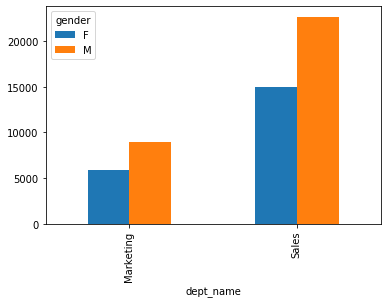

In [40]:
observed.plot.bar()

In [41]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.5691938610810126

In [44]:
alpha = 0.01
null_h = "employee gender is independent of whether someone works in marketing or sales"
alternative_h = "Employee Gender and Working in Marketing or Sales is dependent"

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
    print("We fail to reject the hypothesis that", null_h)

Fail to reject the null
We fail to reject the hypothesis that employee gender is independent of whether someone works in marketing or sales


## Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: Gender is independent of whether or not someone is or has been a manager

$H_a$: Gender and whether or not someone has been or is a manager is dependent

In [49]:
sql = """
    select emp_no, gender, title
    from employees
    join dept_emp using(emp_no)
    join titles using(emp_no)

"""
df = pd.read_sql(sql, url)
df.head()

,emp_no,gender,title
0,10001,M,Senior Engineer
1,10002,F,Staff
2,10003,M,Senior Engineer
3,10004,M,Engineer
4,10004,M,Senior Engineer


In [50]:
df["is_manager"] = df.title.str.contains("Manager")
df.head()

,emp_no,gender,title,is_manager
0,10001,M,Senior Engineer,False
1,10002,F,Staff,False
2,10003,M,Senior Engineer,False
3,10004,M,Engineer,False
4,10004,M,Senior Engineer,False


In [51]:
observed = pd.crosstab(df.is_manager, df.gender)
observed

gender,F,M
is_manager,,
False,195908,293971
True,13,11


In [52]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.2265764599679656

In [53]:
alpha = 0.01
null_h = "gender and whether or not someone has been a manager is independent"
alternative_h = "gender and being a manager are dependent on eachother"
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [ ]:
# Let's account for double counting people w/ multiple titles

In [54]:
sql = """
SELECT
    e.emp_no IN (SELECT emp_no FROM dept_manager) AS is_manager,
    e.gender
FROM employees e
"""
df = pd.read_sql(sql, url)
df.head()

,is_manager,gender
0,0,M
1,0,F
2,0,M
3,0,M
4,0,M


In [57]:
observed = pd.crosstab(df.is_manager, df.gender)
observed

gender,F,M
is_manager,,
0,120038,179962
1,13,11


In [58]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.22745818732810363

In [59]:
alpha = 0.01
null_h = "gender and whether or not someone has been a manager is independent"
alternative_h = "gender and being a manager are dependent on eachother"
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
